<a href="https://colab.research.google.com/github/Kashishkasalwal/Big-Data-Analysis_Stock-Prediction-using-LSTM/blob/main/BDA_StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas_datareader as pdr
key=""

In [25]:
df = pdr.get_data_tiingo('AAPL', api_key="5dce68a8b5101c848814f1cd6598a205efce6654")

In [26]:
df.to_csv('AAPL.csv')

In [27]:
import pandas as pd

In [28]:
df=pd.read_csv('AAPL.csv')

In [29]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-21 00:00:00+00:00,105.91,107.65,105.1401,105.93,35502678,24.622670,25.027197,24.443679,24.627320,142010712,0.0,1.0
1,AAPL,2016-03-22 00:00:00+00:00,106.72,107.29,105.2100,105.25,32444375,24.810984,24.943502,24.459930,24.469229,129777500,0.0,1.0
2,AAPL,2016-03-23 00:00:00+00:00,106.13,107.07,105.9000,106.48,25703495,24.673817,24.892355,24.620345,24.755188,102813980,0.0,1.0
3,AAPL,2016-03-24 00:00:00+00:00,105.67,106.25,104.8900,105.47,26132955,24.566873,24.701716,24.385534,24.520376,104531820,0.0,1.0
4,AAPL,2016-03-28 00:00:00+00:00,105.19,106.19,105.0600,106.00,19411372,24.455280,24.687767,24.425057,24.643594,77645488,0.0,1.0


In [30]:
df1=df.reset_index()['close']

In [31]:
df1

0       105.91
1       106.72
2       106.13
3       105.67
4       105.19
         ...  
1254    123.99
1255    125.57
1256    124.76
1257    120.53
1258    119.99
Name: close, Length: 1259, dtype: float64

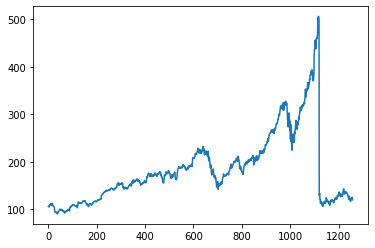

In [32]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [33]:
import numpy as np

In [34]:
df1

0       105.91
1       106.72
2       106.13
3       105.67
4       105.19
         ...  
1254    123.99
1255    125.57
1256    124.76
1257    120.53
1258    119.99
Name: close, Length: 1259, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
print(df1)

[[0.03745039]
 [0.03939868]
 [0.03797956]
 ...
 [0.08279014]
 [0.07261575]
 [0.0713169 ]]


In [37]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [38]:
training_size,test_size

(818, 441)

In [39]:
train_data

array([[0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.01079976],
       [0.00817799],
       [0.00793746],
       [0.01164161],
       [0.00926037],
       [0.00697535],
       [0.00572459],
       [0.00589296],
       [0.0074083 ],
       [0.00521948],
       [0.        ],
       [0.00043295],
       [0.00851473],
       [0.00757667],
       [0.01015033],
       [0.00928443],
       [0.01173782],
       [0.01464823],
       [0.018184  ],
       [0.02232111],
       [0.024

In [40]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [41]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [42]:
print(X_train.shape), print(y_train.shape)

(717, 100)
(717,)


(None, None)

In [43]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [44]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 285ms/step - loss: 0.0183 - val_loss: 0.0511
Epoch 2/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0028 - val_loss: 0.0244
Epoch 3/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0013 - val_loss: 0.0228
Epoch 4/100
12/12 [==============================] - 2s 189ms/step - loss: 6.4262e-04 - val_loss: 0.0206
Epoch 5/100
12/12 [==============================] - 2s 186ms/step - loss: 4.5631e-04 - val_loss: 0.0203
Epoch 6/100
12/12 [==============================] - 2s 188ms/step - loss: 4.2602e-04 - val_loss: 0.0198
Epoch 7/100
12/12 [==============================] - 2s 189ms/step - loss: 4.1468e-04 - val_loss: 0.0195
Epoch 8/100
12/12 [==============================] - 2s 184ms/step - loss: 4.1052e-04 - val_loss: 0.0191
Epoch 9/100
12/12 [==============================] - 2s 187ms/step - loss: 4.0280e-04 - val_loss: 0.0184
Epoch 10/100
12/12 [==============================] - 2s 188ms/step

In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.4.1'

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [53]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [54]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

164.40482471093742

In [55]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

236.6405020630899

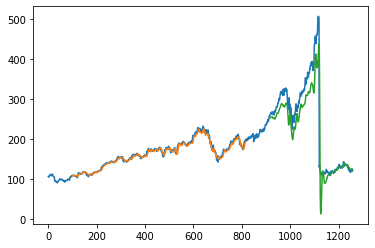

In [56]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [57]:
len(test_data)

441

In [58]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [59]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [60]:
temp_input

[0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131

In [61]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.0820661]
101
1 day input [0.06316296 0.05017438 0.06008419 0.044546   0.04432952 0.04834636
 0.05919423 0.06900782 0.06819002 0.06248948 0.06164762 0.07011425
 0.06944077 0.06956103 0.07206254 0.06987372 0.06660253 0.06806975
 0.06494287 0.05654841 0.05972339 0.06179194 0.06313891 0.06905592
 0.07788334 0.07874925 0.07841251 0.07675286 0.08036079 0.08187613
 0.07562237 0.0791341  0.0771377  0.07562237 0.09029465 0.09012628
 0.09226699 0.08734817 0.0911365  0.09991581 0.09770295 0.10013229
 0.11148527 0.10710764 0.10434155 0.1018641  0.09397474 0.09782321
 0.08721587 0.09760673 0.10032471 0.09294047 0.09250752 0.09753458
 0.0927721  0.08851473 0.09017438 0.10027661 0.11191822 0.11720986
 0.12647023 0.1270475  0.12440168 0.11244738 0.10010824 0.10535177
 0.10739627 0.10487072 0.11316897 0.11165364 0.11201443 0.10984967
 0.10835839 0.10773301 0.10831028 0.10306675 0.09741431 0.09469633
 0.09508118 0.0857727  0.08543596 0.08420926 0.07372219 0.07437162
 0.09007817 0.08365604 0.07629585 

In [62]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [63]:
import matplotlib.pyplot as plt

In [64]:
len(df1)

1259

In [68]:
df3=df1.tolist()
df3.extend(lst_output)

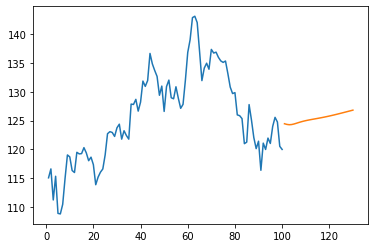

In [76]:
plt.plot(day_new,scaler.inverse_transform(df1[1159:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

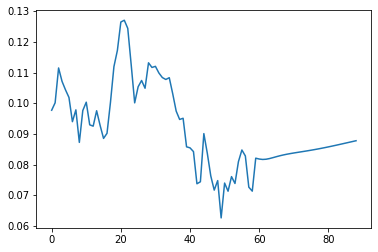

In [77]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [78]:
df3=scaler.inverse_transform(df3).tolist()

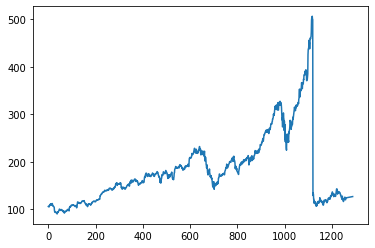

In [79]:
plt.plot(df3)